In [1]:

import numpy as np
from pylab import *
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LinearSegmentedColormap
from scipy.interpolate import griddata
#from mpl_toolkits.axes_grid1 import make_axes_locatable
#%matplotlib inline
from astropy.io.fits import getdata
from astropy.coordinates import SkyCoord

In /Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /

In [2]:

# From Javier at https://github.com/jajgarcia/plot_Chandra_SC_nH/blob/master/plot.galactic_NH.ipynb

log10=np.log10

def plot_mwd(RA1,Dec1,org=0,title='Aitoff projection', projection='aitoff',size_array=1	,levels=1):
    ''' RA,RA1,Dec1,Dec2 are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    x1 = np.remainder(RA1+360-org,360) # shift RA1 values
 
    for i in range(0,len(x1)):
        if(x1[i]>180.):
            x1[i]=x1[i]-360.

        tick_labels = np.array([210, 240, 270, 300, 330, 0, 30, 60, 90, 120, 150])
      
    #INTERPOLATION
    x_tmp=np.radians(x1)
    y_tmp=np.radians(Dec1)
    grid_size_low_x=-180;grid_size_high_x=180.
    grid_size_low_y=-120;grid_size_high_y=120.

    #Create uniform grid
    CS=plt.scatter(x_tmp,y_tmp,marker='o',c=nn,s=5,cmap=cm_mine, edgecolors='none',norm = mpl.colors.Normalize(vmin=1., vmax=2.5)) 

    ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(10)
    ax.set_xlabel("")
    ax.xaxis.label.set_fontsize(10)
    ax.set_ylabel("")
    ax.yaxis.label.set_fontsize(10)
    ax.grid(True)

    
    norm = mpl.colors.Normalize(vmin=0, vmax=3)
    m = cm.ScalarMappable(cmap=cm_mine, norm=norm)
    m.set_array([])
    #divider = make_axes_locatable(ax)
 
    cbar = plt.colorbar(m, fraction=0.046, pad=0.04,aspect=10)
    cbar.set_label('log$_{10}$(N) x10$^{20} $cm$^{-2}$', labelpad=5, fontsize=10)
    

In [20]:
#ALL SOURCES
#filename='/Users/javier/CSC/plots/csc_big_nh.out'
#l_tmp,b_tmp,nn_tmp = np.loadtxt(filename,unpack=True,skiprows=16,usecols=[8,9,18])

straycats = getdata('../straycats.fits')

# Convert to galactic coords:
ra = straycats['RA']
dec = straycats['DEC']
coords = SkyCoord(ra, dec, unit = 'deg')

l = coords.galactic.l.deg
b = coords.galactic.b.deg
org = 0
#x1 = np.remainder(l+360-org,360) # shift RA1 values

#nn_tmp=nn_tmp/1e22

No handles with labels found to put in legend.
/Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.


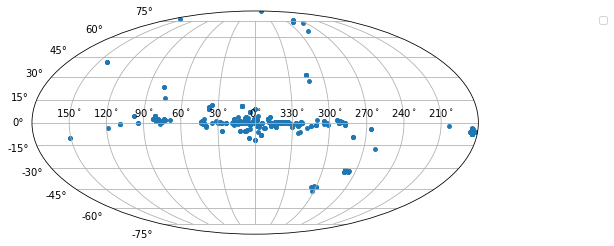

In [104]:
#tt=log10(nn_tmp)    
#colors = [(1, 0, 0),(1, 1, 0), (0, 1, 0), (0, 1, 1), (0, 0, 1), (0.58, 0, 0.84)]  # R -> Y -> G -> Cyan -> B

fig = plt.figure(figsize=(8, 4))


#ax = plt.subplot(111, projection="aitoff")
ax.set_title("Stray Cats")
ax.grid(True)

ax = fig.add_subplot(111, projection='mollweide')
org = 180
x1 = 360 - (l + 180)%360 - 180 # shift galactic longitude and reverse

# for tt in np.unique(straycats['Target Type']):
#     this_one = (np.where(straycats['Target Type'] == tt))[0]
    

#     ax.scatter(np.radians(x1[this_one]), np.radians(b[this_one]), label=tt, s=30, alpha=0.6)
ax.scatter(np.radians(x1), np.radians(b),s=15)
ax.grid(True)
tick_labels = np.array([210, 240, 270, 300, 330, 0, 30, 60, 90, 120, 150])
tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
tick_l = [f'{x}$^\circ$' for x in tick_labels]
ax.set_xticklabels(tick_l)     # we add the scale on the x axis

plt.subplots_adjust(top=0.95,bottom=0.05)

leg = plt.legend(loc='best')

#https://stackoverflow.com/questions/23238041/move-and-resize-legends-box-in-matplotlib


plt.draw() # Draw the figure so you can find the positon of the legend. 

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = 0.3
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)


# Update the plot
plt.savefig('straycats_galactic.pdf')
plt.show()

#org = 0


ColDefs(
    name = 'Classification'; format = '7A'
    name = 'SL Target'; format = '23A'
    name = 'Target Type'; format = '16A'
    name = 'SEQID'; format = 'K'; null = 999999
    name = 'Module'; format = '1A'
    name = 'Multi'; format = '1A'
    name = 'Primary Target'; format = '22A'
    name = 'TIME'; format = 'D'
    name = 'END_TIME'; format = 'D'
    name = 'Exposure'; format = 'D'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'Notes'; format = '68A'
)